In [1]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

In [73]:
train = pd.read_csv('train-2.csv')
train = train.drop("Name", axis=1)
test  =  pd.read_csv('test-2.csv')
test  =  test.drop("Name", axis=1)

#Modifying the DataFrame to replace female by integer 1 and male by integer 2 
mapping = {'male': 0, 'female': 1} 
train = train.replace({'Sex': mapping})
test = test.replace({'Sex': mapping})

column_to_move = train.pop("Survived")
column_to_move2 = test.pop("Survived")
train.insert(6, "Survived", column_to_move)
test.insert(6, "Survived", column_to_move2)


train_data = train.values
test_data = test.values

X_train = train_data[: , :-1]
Y_train = train_data[ : ,-1].reshape(train_data.shape[0],1)
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])


X_test = test_data[: , :-1]
Y_test = test_data[ : ,-1].reshape(test_data.shape[0],1)
X_test = X_test.T
Y_test = Y_test.reshape(1,X_test.shape[1])

In [40]:
print("Shape of X train : ", X_train.shape)
print("Shape of Y train : ", Y_train.shape)

Shape of X train :  (6, 577)
Shape of Y train :  (1, 577)


In [49]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [74]:
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    cost_list = []
    W = np.zeros((n,1))
    B = 0

    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        dW = (1/m)*np.dot(A-Y , X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        cost_list.append(cost)

        if i%(iterations/10) == 0:
            print(" Cost after ", i, " Iterations is ", cost)

    return W,B, cost_list

In [75]:
iteration = 100000
learning_rates = 0.003
W , B , cost_list = model(X_train , Y_train, learning_rate = learning_rates, iterations = iteration)

 Cost after  0  Iterations is  0.6931471805599453
 Cost after  10000  Iterations is  0.47878355830091907
 Cost after  20000  Iterations is  0.4663659867581117
 Cost after  30000  Iterations is  0.46363751730866243
 Cost after  40000  Iterations is  0.46225025201969516
 Cost after  50000  Iterations is  0.46126220097238546
 Cost after  60000  Iterations is  0.46050380628981885
 Cost after  70000  Iterations is  0.4599134647622202
 Cost after  80000  Iterations is  0.4594526365229346
 Cost after  90000  Iterations is  0.459092589036206


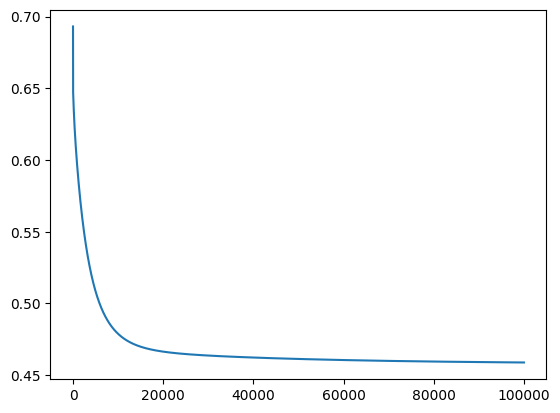

In [77]:
plt.plot(np.arange(iteration),cost_list)

In [79]:
def accuracy(X,Y,W,B):
    Z = np.dot(W.T , X) + B
    A = sigmoid(Z)
    A = A > 0.5

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the Model in % is : ", acc)

In [80]:
accuracy(X_test, Y_test, W, B)

Accuracy of the Model in % is :  80.0
